Section I

In [508]:
# Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

import pandas as pd 
import numpy as np
from env import host, username, password

def get_db_url(host, username, password, database):
    url = f'mysql+pymysql://{username}:{password}@{host}/{database}'
    return url



In [509]:
# Use your function to obtain a connection to the employees database.

url = get_db_url(host, username, password, 'employees')

In [510]:
# Once you have successfully run a query:


pd.read_sql('SELECT * FROM employees', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [511]:
get_db_url(host, username, password, 'titles')
pd.read_sql('Select * from titles', url)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [512]:
sql = '''
SELECT
    emp_no,
    first_name,
    last_name
FROM employees
WHERE gender = 'F'
LIMIT 100
'''

employees = pd.read_sql(sql, url)
employees.head()

,emp_no,first_name,last_name
0,10002,Bezalel,Simmel
1,10006,Anneke,Preusig
2,10007,Tzvetan,Zielinski
3,10009,Sumant,Peac
4,10010,Duangkaew,Piveteau


In [513]:
# Read the employees and titles tables into two separate DataFrames.

titles_df = pd.read_sql('SELECT * FROM titles', url)

# Display the summary statistics for each DataFrame.

titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [514]:
# Read the employees and titles tables into two separate DataFrames.

employees_df = pd.read_sql('SELECT * FROM employees', url)

# Display the summary statistics for each DataFrame.

employees_df.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [515]:
# How many rows and columns do you have in each DataFrame? Is that what you expected? 443,308

titles_df.shape

(443308, 4)

In [516]:
# How many rows and columns do you have in each DataFrame? Is that what you expected?  300,024

employees_df.shape

(300024, 6)

In [517]:
# How many unique titles are in the titles DataFrame?  7

pd.read_sql('SELECT DISTINCT title FROM titles', url).count()


title    7
dtype: int64

In [518]:
# What is the oldest date in the to_date column? 1985-03-01

pd.read_sql('select min(to_date) from titles', url)

,min(to_date)
0,1985-03-01


In [519]:
# What is the most recent date in the to_date column?  2002-8-1
to_date_df = pd.read_sql('select to_date from titles', url)

to_date_df['to_date'][to_date_df['to_date'] != to_date_df['to_date'].max()].max()

datetime.date(2002, 8, 1)

Section II

In [520]:
# Copy the users and roles DataFrames from the examples above.

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles


,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [521]:
# What is the result of using a right join on the DataFrames?

users.merge(roles, how='right', on=None, left_on='role_id', right_on='id', left_index=False, right_index=False, indicator=False)

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [522]:
# What is the result of using an outer join on the DataFrames?

users.merge(roles, how='outer', on=None, left_on='role_id', right_on='id', left_index=False, right_index=False, indicator=False)

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [523]:
# What happens if you drop the foreign keys from the DataFrames and try to merge them?
users.merge(roles, left_on='role_id', right_on='id', how='outer').drop(columns='id')

KeyError: "['id'] not found in axis"

In [459]:
# Load the mpg dataset from PyDataset.
from pydataset import data
mpg = data('mpg')
data('mpg', show_doc=True) 

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [460]:
# How many rows and columns are in the dataset? 234 rows, 11 columns
mpg.shape

(234, 11)

In [461]:
# Check out your column names and perform any cleanup you may want on them.
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


In [462]:
# Display the summary statistics for the dataset.
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [463]:
# How many different manufacturers are there? 15 manufacturers
len(mpg['manufacturer'].unique())

15

In [464]:
(mpg['manufacturer'].nunique()

SyntaxError: unexpected EOF while parsing (<ipython-input-464-d96035f5a486>, line 1)

In [177]:
# How many different models are there? 38 models
len(mpg['model'].unique())

38

In [178]:
# Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

mpg['mileage_difference'] = mpg['hwy'] - mpg['cty']
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


In [179]:
# Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

mpg['average_mileage'] = (mpg['cty']+mpg['hwy'])/2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0


In [180]:
# Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.
mpg['is_automatic'] = mpg['trans'].str.startswith('a')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [205]:
# Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?  Honda
mpg.groupby('manufacturer').average_mileage.agg('mean').sort_values(ascending = False)

manufacturer
honda         28.500000
volkswagen    25.074074
hyundai       22.750000
subaru        22.428571
audi          22.027778
toyota        21.720588
pontiac       21.700000
nissan        21.346154
chevrolet     18.447368
ford          16.680000
mercury       15.625000
jeep          15.562500
dodge         15.540541
lincoln       14.166667
land rover    14.000000
Name: average_mileage, dtype: float64

In [197]:
# Do automatic or manual cars have better miles per gallon? manual cars have better miles per gallon
mpg['a or m'] = np.where(mpg['trans'].str.startswith('a') , 'auto', 'manual')
mpg.groupby('a or m').average_mileage.agg('mean')


a or m
auto      19.130573
manual    22.227273
Name: average_mileage, dtype: float64

Section III

In [571]:
# Use your get_db_url function to help you explore the data from the chipotle database.
url = get_db_url(host, username, password, 'chipotle')

In [423]:
# What is the total price for each order?
orders_df = pd.read_sql('SELECT * FROM orders', url)


orders_df['item_price']

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [418]:
orders_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [369]:
# What are the most popular 3 items?
orders_df.groupby('item_name').quantity.agg('sum').sort_values(ascending = False).head(3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [466]:
# Which item has produced the most revenue?  Chicken Bowl
orders_df['item_price_flt'] = orders_df.item_price.str[1:].str.replace(',', '').astype('float')
orders_df.groupby('item_name').item_price_flt.agg('sum').sort_values(ascending = False).head(5)


item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Steak Bowl             2260.19
Chips and Guacamole    2201.04
Name: item_price_flt, dtype: float64

In [507]:
# Using the titles DataFrame, visualize the number of employees with each title.
titles_df = pd.read_sql('SELECT * FROM titles', url)
curemp = titles_df[titles_df['to_date'] == titles_df['to_date'].max()]
curemp.groupby('title').count()





,emp_no,from_date,to_date
title,,,
Assistant Engineer,3588,3588,3588
Engineer,30983,30983,30983
Manager,9,9,9
Senior Engineer,85939,85939,85939
Senior Staff,82024,82024,82024
Staff,25526,25526,25526
Technique Leader,12055,12055,12055


In [532]:
# Join the employees and titles DataFrames together.
employees_df.merge(titles_df, how='inner', on="emp_no")



,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


Text(0, 0.5, 'Employees')

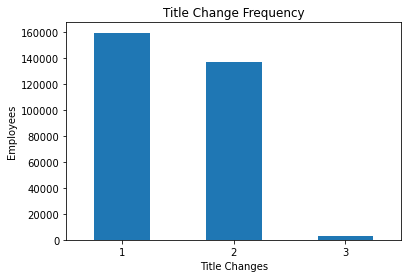

In [570]:
# Visualize how frequently employees change titles.
from matplotlib import pyplot as plt

titles_df.groupby('emp_no').title.count().value_counts().plot.bar()
plt.title('Title Change Frequency')
plt.xlabel('Title Changes')
plt.xticks(rotation=0)
plt.ylabel('Employees')
plt.yticks()



In [604]:
# For each title, find the hire date of the employee that was hired most recently with that title.
emptit_merge = employees_df.merge(titles_df, how='inner', on="emp_no")
emptit_merge['name'] = emptit_merge['first_name'] + emptit_merge['last_name']
emptit_merge.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [ ]:
emptit_merge = employees_df.merge(titles_df, how='inner', on="emp_no")
emptit_merge['name'] = emptit_merge['first_name'] + emptit_merge['last_name']
emptit_merge.groupby('title').max('to_date')

In [ ]:
titles_df['to_date'][titles_df['to_date'] != titles_df['to_date'].max()]
curemp.groupby('title').count()
titles_df['title']